#### Татур А.А.
#### v.0.1
#### 30.11.2020

Цели
1. Загрузить датасет, визуализировать первые 10 элементов
2. Применить к датасету методы кластеризации KMeans и AgglomerativeClustering, визуализировать центры, оценить качество визуализации
3. Проверить влияние количества кластеров на значения метрик кластеризации (v-score и silhouette_score)
4. Проверить влияние понижения размерности на кластеризацию различными методиками.
5. Визуализировать центры для лучшей модели
6. Итоги

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# 1. Получение данных

In [13]:
X = load_digits().data
y = load_digits().target

print ('X.shape - ', X.shape)
print ('y.shape - ', y.shape)

X.shape -  (1797, 64)
y.shape -  (1797,)


#### Визуализируем первые 10 элементов

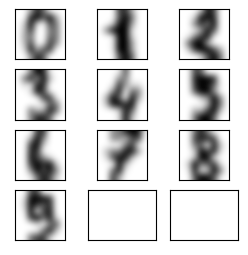

In [29]:
fig, ax = plt.subplots(ncols=3,
                      nrows=4,
                      figsize = (3,3),
                      subplot_kw=dict(xticks=[], yticks=[]))
ax=ax.reshape (12,)
#plt.gray()
for x in range(10):
    #ax[x].imshow(abs(X[x].reshape(8,8)-15),interpolation='bicubic')# 1й способ. Вычитаем из всего массива 15 и берем модуль.
    ax[x].imshow(X[x].reshape(8,8), cmap='binary', interpolation='bicubic')#2-й способ ставим цветовую карту binary

# 2. Кластеризация и оценка качества

#### 1. Метод KMeans

In [38]:
kmeans = KMeans(n_clusters=10)
k_predict = kmeans.fit_predict(X)

#### Визуализируем центры после кластеризациии методом KMeans

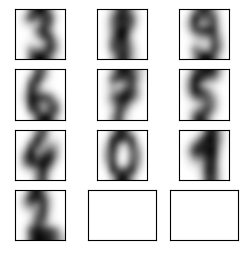

In [39]:
fig, ax = plt.subplots(ncols=3,
                      nrows=4,
                      figsize = (3,3),
                      subplot_kw=dict(xticks=[], yticks=[]))
ax=ax.reshape(12,)

for x in range (10):
    ax[x].imshow(np.mean((X[k_predict==x]), axis=0).reshape(8,8), cmap='binary', interpolation='bicubic')    

#### 2. Метод AgglomerativeClustering

In [40]:
aggl=AgglomerativeClustering(n_clusters=10)
aggl_predict = aggl.fit_predict(X)

#### Визуализируем центры после кластеризациии методом AgglomerativeClustering

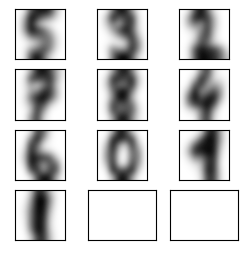

In [41]:
fig, ax = plt.subplots(ncols=3,
                      nrows=4,
                      figsize = (3,3),
                      subplot_kw=dict(xticks=[], yticks=[]))
ax=ax.reshape(12,)

for x in range (10):
    ax[x].imshow(np.mean((X[aggl_predict==x]), axis=0).reshape(8,8), cmap='binary', interpolation='bicubic')    

##### Выводы:
При визуальной оценке лучше качество визуализации центров у метода KMeans, c некоторыми проблемами при построении цифр "8" и "1"

#### 3. Оценка качества кластеризации

#### Для KMeans

In [48]:
k_score=[]

for x in range (2,21,1):
    kmeans = KMeans(n_clusters=x)
    k_predict = kmeans.fit_predict(X)
    k_score.append([x,
                   silhouette_score(X, k_predict),
                   v_measure_score(y, k_predict)])
k_score_arr = np.array(k_score)

In [47]:
k_score_arr

array([[ 2.        ,  0.11832841,  0.36001205],
       [ 3.        ,  0.12649498,  0.40401655],
       [ 4.        ,  0.12846529,  0.45730385],
       [ 5.        ,  0.1380204 ,  0.58078782],
       [ 6.        ,  0.1511313 ,  0.5917997 ],
       [ 7.        ,  0.16438432,  0.65404373],
       [ 8.        ,  0.17866343,  0.71352257],
       [ 9.        ,  0.18904556,  0.71733845],
       [10.        ,  0.18229899,  0.74081275],
       [11.        ,  0.18281741,  0.77480681],
       [12.        ,  0.18442707,  0.77334853],
       [13.        ,  0.18108733,  0.7681452 ],
       [14.        ,  0.18806659,  0.7833547 ],
       [15.        ,  0.18673956,  0.77646287],
       [16.        ,  0.18733494,  0.78144904],
       [17.        ,  0.16894156,  0.75758914],
       [18.        ,  0.17137484,  0.76299821],
       [19.        ,  0.15813432,  0.76435349]])

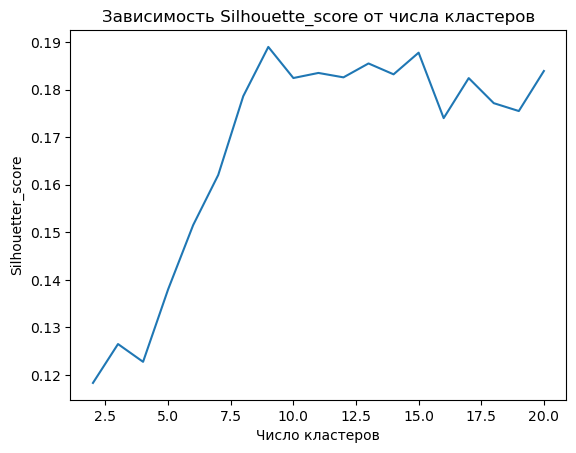

In [53]:
plt.plot (k_score_arr[:,0],k_score_arr[:,1]);
plt.title ('Зависимость Silhouette_score от числа кластеров');
plt.xlabel ('Число кластеров');
plt.ylabel ('Silhouetter_score');

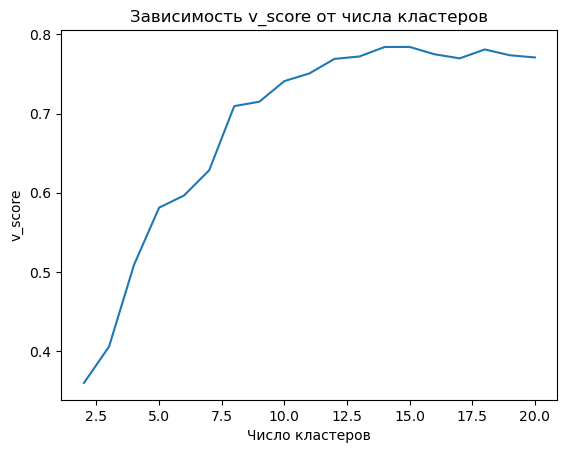

In [54]:
plt.plot (k_score_arr[:,0],k_score_arr[:,2]);
plt.title ('Зависимость v_score от числа кластеров');
plt.xlabel ('Число кластеров');
plt.ylabel ('v_score');

# Вывод:
1. Силуэт максимален при числе кластеров 9 (18.9)
2. V-score максимален при числе кластеров 14 (78.3)

#### Для AgglomerativeClustering

In [57]:
aggl_score=[]

for x in range (2,21,1):
    aggl = AgglomerativeClustering(n_clusters=x)
    aggl_predict = aggl.fit_predict(X)
    aggl_score.append([x,
                   silhouette_score(X, aggl_predict),
                   v_measure_score(y, aggl_predict)])
aggl_score_arr = np.array(aggl_score)

In [58]:
aggl_score_arr

array([[ 2.        ,  0.11674034,  0.40824219],
       [ 3.        ,  0.11188955,  0.54406137],
       [ 4.        ,  0.10895989,  0.62116384],
       [ 5.        ,  0.11888126,  0.70965353],
       [ 6.        ,  0.13701123,  0.75666649],
       [ 7.        ,  0.15368571,  0.79830065],
       [ 8.        ,  0.17056309,  0.8457771 ],
       [ 9.        ,  0.18061976,  0.84465979],
       [10.        ,  0.1784966 ,  0.86817011],
       [11.        ,  0.17637338,  0.85537996],
       [12.        ,  0.17362319,  0.86854875],
       [13.        ,  0.17264072,  0.85715808],
       [14.        ,  0.17670992,  0.85174739],
       [15.        ,  0.17633457,  0.84018796],
       [16.        ,  0.17695215,  0.83212523],
       [17.        ,  0.17953047,  0.83830914],
       [18.        ,  0.16698293,  0.82710767],
       [19.        ,  0.16585394,  0.82628061],
       [20.        ,  0.16860391,  0.82509435]])

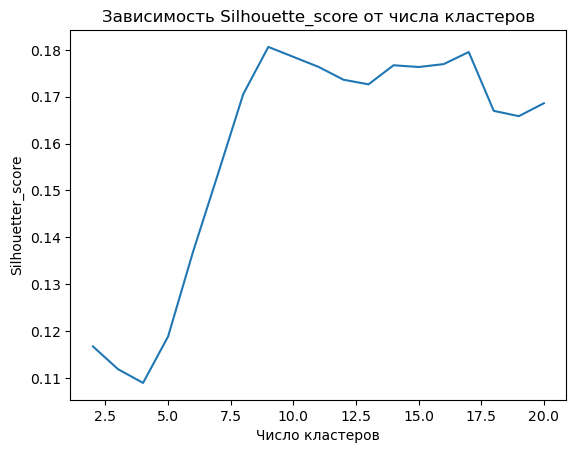

In [59]:
plt.plot (aggl_score_arr[:,0],aggl_score_arr[:,1]);
plt.title ('Зависимость Silhouette_score от числа кластеров');
plt.xlabel ('Число кластеров');
plt.ylabel ('Silhouetter_score');

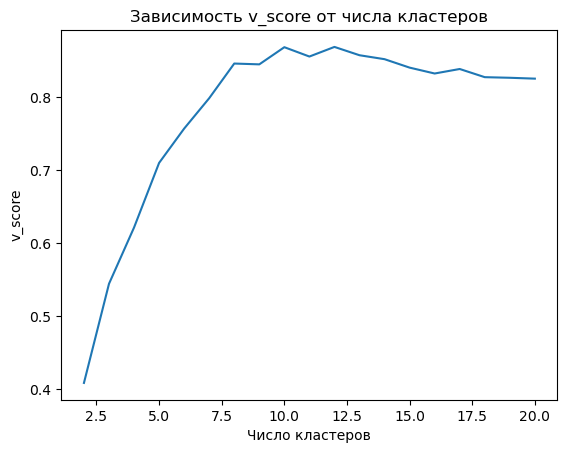

In [60]:
plt.plot (aggl_score_arr[:,0],aggl_score_arr[:,2]);
plt.title ('Зависимость v_score от числа кластеров');
plt.xlabel ('Число кластеров');
plt.ylabel ('v_score');

# Вывод:
1. Силуэт максимален при числе кластеров 9 (0.1806)
2. V-score максимален при числе кластеров 12 (0.8685)

# 3. Снижение размерности признакового пространства

### TruncatedSVD + KMeans

In [120]:
k_score_SVD=[]

for x in [2,5,10,20]:
    X_truncated = TruncatedSVD(n_components=x).fit_transform(X)
    kmeans = KMeans(n_clusters=10)
    k_predict = kmeans.fit_predict(X_truncated)
    k_score_SVD.append([x,
                   silhouette_score(X_truncated, k_predict),
                   v_measure_score(y, k_predict)])
k_score_SVD_arr = np.array(k_score_SVD).astype(np.float32)

In [121]:
k_score_SVD_arr

array([[ 2.        ,  0.34926158,  0.34685442],
       [ 5.        ,  0.31221163,  0.6339501 ],
       [10.        ,  0.26328972,  0.7214733 ],
       [20.        ,  0.21294995,  0.74805677]], dtype=float32)

##### Вывод:
после применения метода понижения размерности SVD наилучшие результаты для KMeans: silhouette при 2х компонентах - 0.35, v_score = 0.748 при 20 компонентах. На оригинальном наборе без понижения размерности аналогичные показатели составили 0.182 и 0.7408. Какого-либо значительного улучшения показателей по v-score И улучшение по silhouette.

### TruncatedSVD + AgglomerativeClustering

In [118]:
aggl_score_SVD=[]

for x in [2,5,10,20]:
    X_truncated = TruncatedSVD(n_components=x).fit_transform(X)
    aggl = AgglomerativeClustering(n_clusters=10)
    agl_predict = aggl.fit_predict(X_truncated)
    aggl_score_SVD.append([x,
                   silhouette_score(X_truncated, agl_predict),
                   v_measure_score(y, agl_predict)])
agl_score_SVD_arr = np.array(aggl_score_SVD).astype(np.float32)

In [119]:
agl_score_SVD_arr

array([[ 2.        ,  0.2808169 ,  0.333719  ],
       [ 5.        ,  0.27274215,  0.6756036 ],
       [10.        ,  0.25070977,  0.82597536],
       [20.        ,  0.19566189,  0.8171311 ]], dtype=float32)

##### Вывод:
после применения метода понижения размерности SVD наилучшие результаты при AgglomerativeClustering Для silhouette при 2 компонентах - 0.2808, для v_score при 10 компонентах = 0.826. На оригинальном наборе без понижения размерности аналогичные показатели составили 0.1784966 и  0.86817011. Что говорит о некотором ухудшении качества кластеризации по параметру v-score и улучшение по silhouette

### Визуализация данных при помощи TSNE

In [93]:
X_TSNE = TSNE(n_components=2, init='random', learning_rate='auto').fit_transform(X)

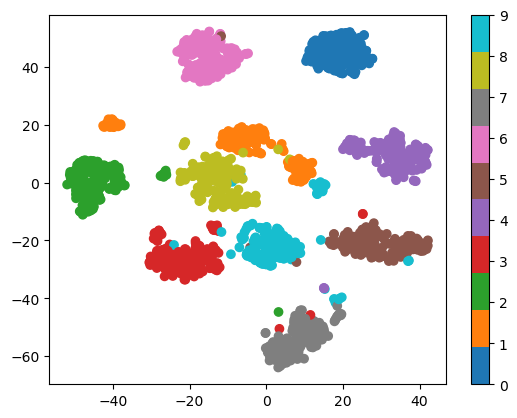

In [110]:
plt.scatter(X_TSNE[:,0], X_TSNE[:,1], c=y, cmap='tab10');
cbar = plt.colorbar()

In [116]:
kmeans = KMeans(n_clusters=10)
k_predict_TSNE = kmeans.fit_predict(X_TSNE)
print ('For TSNE (2 components) + KMeans(10 components) \
        best silhouetter - {}, v_score - {}'.format(silhouette_score(X_TSNE, k_predict_TSNE),
                                                   v_measure_score(y, k_predict_TSNE)))

For TSNE (2 components) + KMeans(10 components)         best silhouetter - 0.6325210332870483, v_score - 0.9183835006995668


In [117]:
aggl = AgglomerativeClustering(n_clusters=10)
aggl_predict_TSNE = aggl.fit_predict(X_TSNE)
print ('For TSNE (2 components) + AgglClust(10 components) \
        best silhouetter - {}, v_score - {}'.format(silhouette_score(X_TSNE, aggl_predict_TSNE),
                                                   v_measure_score(y, aggl_predict_TSNE)))

For TSNE (2 components) + AgglClust(10 components)         best silhouetter - 0.6211845278739929, v_score - 0.89672445527698


##### Вывод:
после применения метода понижения размерности TSNE наилучшие результаты при 10 компонентах для KMeans silhouette - 0.6325210332870483, 0.9183835006995668. Для AgglomerativeClustering silhouetter - 0.6211845278739929, v_score - 0.89672445527698

### Визуализация центров кластеризации для TSNE + KMeans

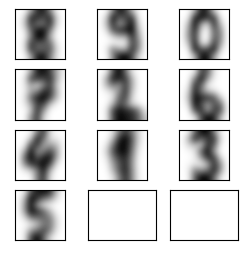

In [123]:
fig, ax = plt.subplots(ncols=3,
                      nrows=4,
                      figsize = (3,3),
                      subplot_kw=dict(xticks=[], yticks=[]))
ax=ax.reshape(12,)

for x in range (10):
    ax[x].imshow(np.mean((X[k_predict_TSNE==x]), axis=0).reshape(8,8), cmap='binary', interpolation='bicubic')    

# Итог:
- Оба метода на указанном "игрушечном" наборе показывают себя практически одинаково.
- Качество кластеризации и по метрикам и по визуальой оценке после построения центров кластеров значительно улучшаются при понижении размерности набора. Наилучший результат дает связка TSNE+KMeans. Даже визуально очевидно, что качество отображение "8" и "1" значительно возросло.